In [25]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Я загружаю данные по трем акциям: данные по Apple и Google за 10 лет, Facebook за 8, так как их начали выпускать только с 2012. Я считаю доходности акций, убираю отсутствующие значения.

In [4]:
apple = pdr.get_data_yahoo(symbols='AAPL', start="2010-05-27", end="2020-05-27")
google = pdr.get_data_yahoo(symbols='GOOGL', start="2010-05-27", end="2020-05-27")
fb = pdr.get_data_yahoo(symbols='FB', start="2010-05-27", end="2020-05-27")

In [5]:
apple = apple[['Close']]
apple['Returns'] = apple['Close'].pct_change()
apple = apple[apple.index > "2010-05-27"]

In [6]:
google = google[['Close']]
google['Returns'] = google['Close'].pct_change()
google = google[google.index > "2010-05-27"]

In [7]:
fb = fb[['Close']]
fb['Returns'] = fb['Close'].pct_change()
fb = fb[fb.index > "2012-05-18"]

Описательная статистика:

In [8]:
apple['Returns'].describe()

count    2516.000000
mean        0.001010
std         0.017278
min        -0.128647
25%        -0.007027
50%         0.000788
75%         0.009896
max         0.119808
Name: Returns, dtype: float64

In [9]:
google['Returns'].describe()

count    2516.000000
mean        0.000824
std         0.016224
min        -0.116342
25%        -0.006557
50%         0.000668
75%         0.008617
max         0.162584
Name: Returns, dtype: float64

In [10]:
fb['Returns'].describe()

count    2017.000000
mean        0.001148
std         0.023519
min        -0.189609
25%        -0.009159
50%         0.001054
75%         0.011952
max         0.296115
Name: Returns, dtype: float64

Распределение доходности акций:

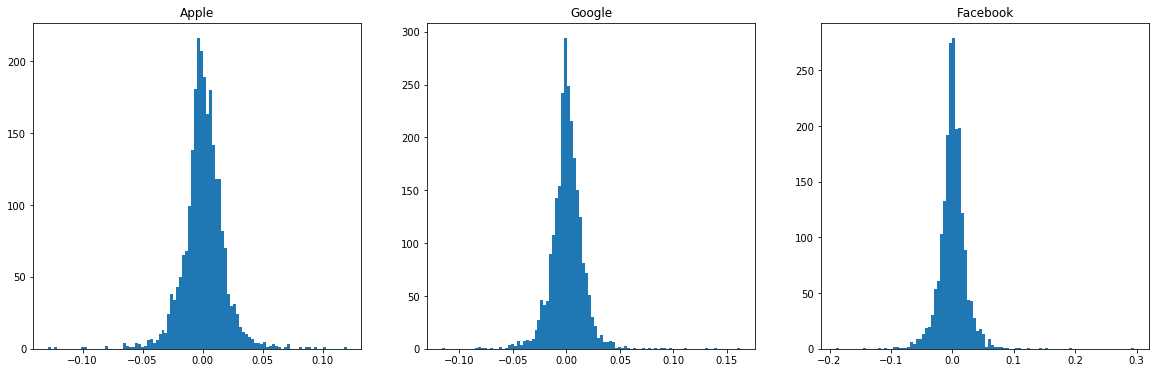

In [11]:
plot = plt.figure(figsize=(20,6))
ax1 = plot.add_subplot(131, title = 'Apple')
plt.hist(apple["Returns"], bins = 100)

ax2 = plot.add_subplot(132, title = 'Google')
plt.hist(google["Returns"], bins = 100)

ax2 = plot.add_subplot(133, title = 'Facebook')
plt.hist(fb["Returns"], bins = 100)
plt.show()

Внешне по форме графика акции походят на нормальное распределение либо на распределение Student-t. Поэтому с помощью Шапиро-Уилк теста я проверяю, является ли распределение нормальным.

In [52]:
from scipy.stats import shapiro

In [53]:
stat, p = shapiro(apple['Returns'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Apple sample looks Gaussian (fail to reject H0)')
else:
    print('Apple sample does not look Gaussian (reject H0)')

Statistics=0.931, p=0.000
Apple sample does not look Gaussian (reject H0)


In [54]:
stat, p = shapiro(google['Returns'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Google sample looks Gaussian (fail to reject H0)')
else:
    print('Google sample does not look Gaussian (reject H0)')

Statistics=0.891, p=0.000
Google sample does not look Gaussian (reject H0)


In [55]:
stat, p = shapiro(fb['Returns'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Facebook sample looks Gaussian (fail to reject H0)')
else:
    print('Facebook sample does not look Gaussian (reject H0)')

Statistics=0.867, p=0.000
Facebook sample does not look Gaussian (reject H0)


Ни одно из распределений не является нормальным. Остается проверить, что они приближены к Student-t распределению. Проверяю с помощью реализованого Python3 fitter.

In [45]:
from fitter import Fitter

In [46]:
fitter_apple = Fitter(apple['Returns'])
fitter_apple.fit()

Fitted alpha distribution with error=691.3098716462481)
Fitted anglit distribution with error=8367.192248825748)
Fitted arcsine distribution with error=8416.613497493541)
Fitted argus distribution with error=6036.377060774683)
Fitted beta distribution with error=626.5882879424744)
Fitted betaprime distribution with error=632.5017961987104)
Fitted bradford distribution with error=7008.571971290924)
Fitted burr distribution with error=180.83916736566044)
Fitted burr12 distribution with error=179.5835836798563)
Fitted cauchy distribution with error=432.97237033727714)
Fitted chi distribution with error=660.6149046986159)
Fitted chi2 distribution with error=8557.680790245457)
Fitted cosine distribution with error=8367.192248825748)
Fitted crystalball distribution with error=417.53765410933954)
Fitted dgamma distribution with error=144.8353486604686)
Fitted dweibull distribution with error=169.67849608678483)
Fitted erlang distribution with error=656.1094364125901)
Fitted expon distribution

,sumsquare_error,aic,bic,kl_div
t,102.933334,213.017107,-8018.510424,inf
nct,104.611151,214.888292,-7969.999780,inf
tukeylambda,104.934519,221.766631,-7970.064868,inf
johnsonsu,106.514406,226.208804,-7924.636068,inf
norminvgauss,112.745551,244.921476,-7781.593210,inf


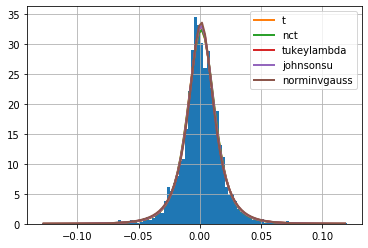

In [47]:
fitter_apple.summary()

In [48]:
fitter_google = Fitter(google['Returns'])
fitter_google.fit()

Fitted alpha distribution with error=816.6360356192426)
Fitted anglit distribution with error=8363.639191214377)
Fitted arcsine distribution with error=8351.221005498237)
Fitted argus distribution with error=7191.442162151865)
Fitted beta distribution with error=788.4649446004562)
Fitted betaprime distribution with error=786.2640772741935)
Fitted bradford distribution with error=7051.916452719927)
Fitted burr distribution with error=2285.9060044563294)
Fitted burr12 distribution with error=213.4098219895191)
Fitted cauchy distribution with error=298.5350437587742)
Fitted chi distribution with error=803.4661950927394)
Fitted chi2 distribution with error=8888.832609609246)
Fitted cosine distribution with error=8363.639191214377)
Fitted crystalball distribution with error=579.4379126927671)
Fitted dgamma distribution with error=75.07259129770222)
Fitted dweibull distribution with error=83.05928951809044)
Fitted erlang distribution with error=8382.009873562149)
Fitted expon distribution wi

,sumsquare_error,aic,bic,kl_div
dgamma,75.072591,602.010088,-8812.625466,inf
dweibull,83.059290,576.679485,-8558.259992,inf
norminvgauss,85.305582,404.335100,-8483.289581,inf
laplace,85.564358,560.070368,-8491.329661,inf
tukeylambda,86.065947,347.758358,-8468.793189,inf


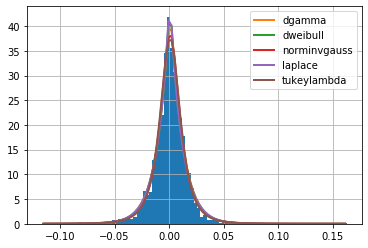

In [49]:
fitter_google.summary()

In [50]:
fitter_fb = Fitter(fb['Returns'])
fitter_fb.fit()

Fitted alpha distribution with error=424.9222039317801)
Fitted anglit distribution with error=2756.026997667097)
Fitted arcsine distribution with error=3480.733007163738)
Fitted argus distribution with error=3340.0564826763757)
Fitted beta distribution with error=413.72814630823297)
Fitted betaprime distribution with error=413.389853757559)
Fitted bradford distribution with error=3040.113450286281)
SKIPPED burr distribution (taking more than 30 seconds)
Fitted burr12 distribution with error=178.74211697474772)
Fitted cauchy distribution with error=111.77183684320396)
Fitted chi distribution with error=425.2436140806657)
Fitted chi2 distribution with error=581.5032115477684)
Fitted cosine distribution with error=3475.4252180158906)
Fitted crystalball distribution with error=326.8529886987912)
Fitted dgamma distribution with error=47.8772945752834)
Fitted dweibull distribution with error=57.40587945028427)
Fitted erlang distribution with error=3227.8683774925307)
Fitted expon distributio

,sumsquare_error,aic,bic,kl_div
johnsonsu,32.126251,563.522033,-8319.323421,inf
t,35.011470,515.505276,-8153.466293,inf
laplace,38.383247,973.834255,-7975.621840,inf
dgamma,47.877295,948.892048,-7522.214554,inf
dweibull,57.405879,893.398283,-7156.118258,inf


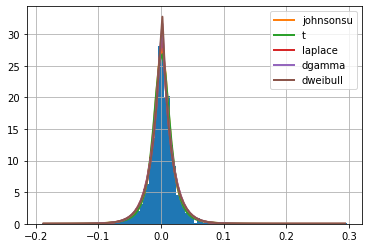

In [51]:
fitter_fb.summary()

Распределения доходностей стационарны, как видно по графикам, так как у них не меняются характеристики со временем: среднее и диспрсия.

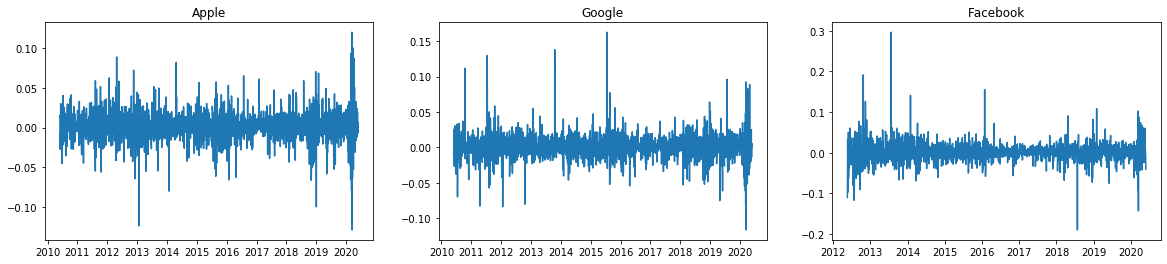

In [13]:
plot = plt.figure(figsize=(20,4))
ax1 = plot.add_subplot(131, title = 'Apple')
plt.plot(apple["Returns"])

ax2 = plot.add_subplot(132, title = 'Google')
plt.plot(google["Returns"])

ax2 = plot.add_subplot(133, title = 'Facebook')
plt.plot(fb["Returns"])
plt.show()

Далее я проверяю по критерию Дики-Фуллера, что все распределения доходностей стационарны.

In [14]:
from statsmodels.tsa.stattools import adfuller

In [15]:
result = adfuller(apple['Returns'])
print('Adf Statistics:', result[0])
print('p-value: ', result[1])
print('Critical values:')
for key, value in result[4].items():
    print("\t", key, value)

if result[0] < result[4]['5%']: 
    print('Доходности Apple стационарны')
else:
    print('Доходности Apple не стационарны')

Adf Statistics: -10.217095321980091
p-value:  5.445515034723672e-18
Critical values:
	 1% -3.4329747166494915
	 5% -2.862699584647827
	 10% -2.567387292022104
Доходности Apple стационарны


In [16]:
result = adfuller(google['Returns'])
print('Adf Statistics:', result[0])
print('p-value: ', result[1])
print('Critical values:')
for key, value in result[4].items():
    print("\t", key, value)

if result[0] < result[4]['5%']: 
    print('Доходности Google стационарны')
else:
    print('Доходности Google не стационарны')

Adf Statistics: -17.067878667009925
p-value:  7.863086702689428e-30
Critical values:
	 1% -3.4329610922579095
	 5% -2.8626935681060375
	 10% -2.567384088736619
Доходности Google стационарны


In [17]:
result = adfuller(fb['Returns'])
print('Adf Statistics:', result[0])
print('p-value: ', result[1])
print('Critical values:')
for key, value in result[4].items():
    print("\t", key, value)

if result[0] < result[4]['5%']: 
    print('Доходности Facebook стационарны')
else:
    print('Доходности Facebook не стационарны')

Adf Statistics: -15.139173975514469
p-value:  7.05093563193945e-28
Critical values:
	 1% -3.4336124232421144
	 5% -2.8629811656983755
	 10% -2.5675372145497732
Доходности Facebook стационарны


Я смотрю по графикам автокорелляций на то, как зависит значение акции от предыдущих нескольких значений. Значимо влияет только 7 и 8 день. Видимо, зависимость связана с недельным периодом.

In [18]:
from statsmodels.graphics.tsaplots import plot_acf

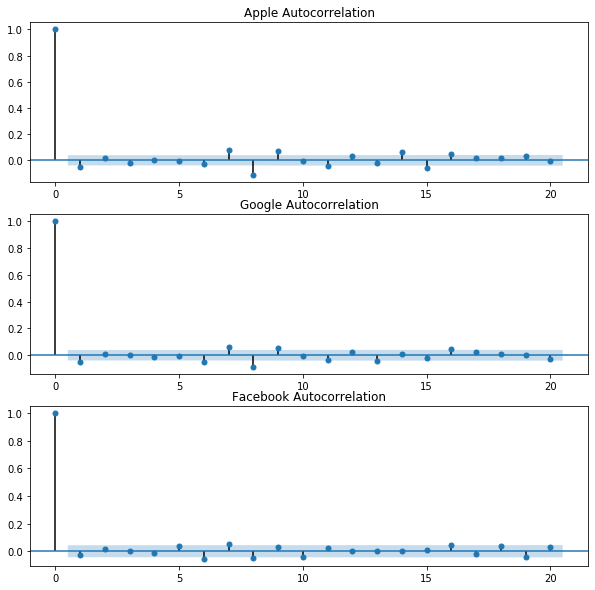

In [19]:
plot = plt.figure(figsize=(10,10))
ax1 = plot.add_subplot(311)
fig = plot_acf(apple['Returns'].squeeze(), lags=20, ax=ax1, title = 'Apple Autocorrelation')

ax2 = plot.add_subplot(312)
fig = plot_acf(google['Returns'].squeeze(), lags=20, ax=ax2, title = 'Google Autocorrelation')

ax3 = plot.add_subplot(313)
fig = plot_acf(fb['Returns'].squeeze(), lags=20, ax=ax3, title = 'Facebook Autocorrelation')

С помощью модели ARMA я выясняю, что действительно у всех трех акций значимая зависимость от 7-го и 8-го дня назад.

In [22]:
from statsmodels.tsa.arima_model import ARMA

In [26]:
arma_apple = ARMA(apple['Returns'], order=(12,1))
print(arma_apple.fit().summary())

                              ARMA Model Results                              
Dep. Variable:                Returns   No. Observations:                 2516
Model:                    ARMA(12, 1)   Log Likelihood                6675.336
Method:                       css-mle   S.D. of innovations              0.017
Date:                Wed, 27 May 2020   AIC                         -13320.672
Time:                        18:27:10   BIC                         -13233.216
Sample:                             0   HQIC                        -13288.932
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0010      0.000      2.870      0.004       0.000       0.002
ar.L1.Returns      0.7850      0.111      7.084      0.000       0.568       1.002
ar.L2.Returns      0.0375      0.026

In [27]:
arma_google = ARMA(google['Returns'], order=(12,1))
print(arma_google.fit().summary())

                              ARMA Model Results                              
Dep. Variable:                Returns   No. Observations:                 2516
Model:                    ARMA(12, 1)   Log Likelihood                6824.291
Method:                       css-mle   S.D. of innovations              0.016
Date:                Wed, 27 May 2020   AIC                         -13618.581
Time:                        18:27:45   BIC                         -13531.125
Sample:                             0   HQIC                        -13586.841
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0008      0.000      2.847      0.004       0.000       0.001
ar.L1.Returns     -0.6393      0.238     -2.683      0.007      -1.106      -0.172
ar.L2.Returns     -0.0171      0.025

In [28]:
arma_fb = ARMA(fb['Returns'], order=(12,1))
print(arma_fb.fit().summary())

                              ARMA Model Results                              
Dep. Variable:                Returns   No. Observations:                 2017
Model:                    ARMA(12, 1)   Log Likelihood                4716.534
Method:                       css-mle   S.D. of innovations              0.023
Date:                Wed, 27 May 2020   AIC                          -9403.067
Time:                        18:28:55   BIC                          -9318.927
Sample:                             0   HQIC                         -9372.186
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0011      0.001      2.258      0.024       0.000       0.002
ar.L1.Returns     -1.0132      0.022    -45.296      0.000      -1.057      -0.969
ar.L2.Returns     -0.0118      0.032

По матрице корелляций все акции достаточно сильно зависят друг от друга.

In [29]:
x = pd.DataFrame({'Apple': apple['Returns']['2012-05-21':], 'Google': google['Returns']['2012-05-21':], 'Facebook': fb['Returns']})


In [30]:
x.corr()

,Apple,Google,Facebook
Apple,1.000000,0.520465,0.368175
Google,0.520465,1.000000,0.484114
Facebook,0.368175,0.484114,1.000000


С помощью Granger causality я получаю, что Apple и Google значимо влияют на акции, Facebook не оказывает значимого влияния на оставшиеся акции.

In [31]:
from statsmodels.tsa.stattools import grangercausalitytests

In [32]:
maxlag=12
names = ['Apple', 'Google', 'Facebook']
test = 'ssr_chi2test'

df = pd.DataFrame(np.zeros((3, 3)), columns=names, index=names)
for col in df.columns:
    for row in df.index:
        test_result = grangercausalitytests(x[[row, col]], maxlag=maxlag, verbose=False)
        df.loc[row, col] = np.min([round(test_result[i+1][0][test][1],4) for i in range(maxlag)])
df

,Apple,Google,Facebook
Apple,1.0000,0.0000,0.0619
Google,0.0000,1.0000,0.6173
Facebook,0.0003,0.0009,1.0000


Создаем стандартную нормальную величину. Строим графики.

In [33]:
from scipy.stats import norm

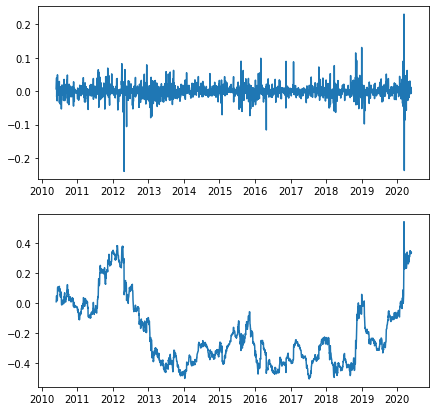

In [34]:
apple['Random'] = norm.rvs(loc=0, scale=1, size=len(apple['Returns']))
apple['Pnl'] = apple["Returns"]*apple['Random']
apple['Sum'] = np.cumsum(apple["Pnl"])

plot = plt.figure(figsize=(7,7))
ax1 = plot.add_subplot(211)
plt.plot(apple['Pnl'])
ax2 = plot.add_subplot(212)
plt.plot(apple['Sum'])

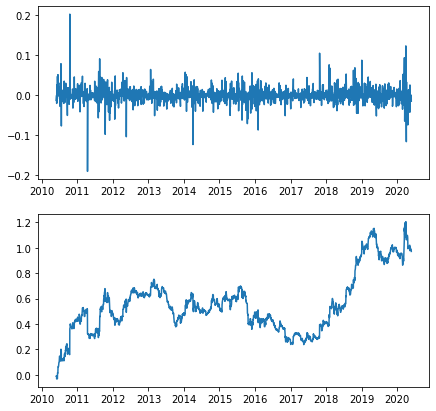

In [35]:
google['Random'] = norm.rvs(loc=0, scale=1, size=len(google['Returns']))
google['Pnl'] = google["Returns"]*google['Random']
google['Sum'] = np.cumsum(google["Pnl"])

plot = plt.figure(figsize=(7,7))
ax1 = plot.add_subplot(211)
plt.plot(google['Pnl'])
ax2 = plot.add_subplot(212)
plt.plot(google['Sum'])

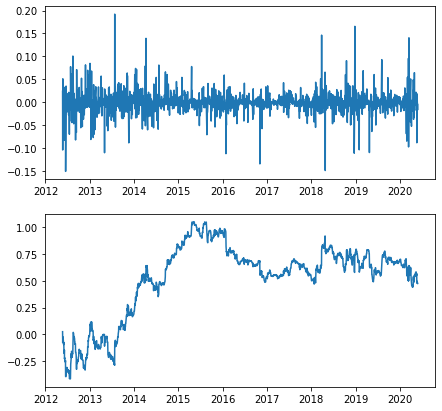

In [36]:
fb['Random'] = norm.rvs(loc=0, scale=1, size=len(fb['Returns']))
fb['Pnl'] = fb["Returns"]*fb['Random']
fb['Sum'] = np.cumsum(fb["Pnl"])

plot = plt.figure(figsize=(7,7))
ax1 = plot.add_subplot(211)
plt.plot(fb['Pnl'])
ax2 = plot.add_subplot(212)
plt.plot(fb['Sum'])

Я создаю Scatter plot для каждой из акций. В общем, графики выглядят довольно похоже.

In [43]:
def apple_rand():
    apple['Random'] = norm.rvs(loc=0, scale=1, size=len(apple['Returns']))
    apple['Pnl'] = apple["Returns"]*apple['Random']
    sr.append(apple['Pnl'].mean()/apple['Pnl'].std())
    hr.append(sum(np.sign(apple['Random']) == np.sign(apple['Returns']))/len(apple['Returns']))
    return

hr = []
sr = []
for i in range(20):
    apple_rand()

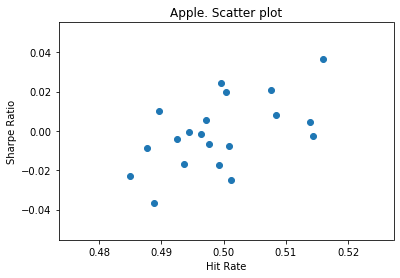

In [44]:
plt.scatter(hr, sr)
plt.title('Apple. Scatter plot')
plt.xlabel('Hit Rate')
plt.ylabel('Sharpe Ratio')
plt.show()

In [39]:
def google_rand():
    google['Random'] = norm.rvs(loc=0, scale=1, size=len(google['Returns']))
    google['Pnl'] = google["Returns"]*google['Random']
    sr.append(google['Pnl'].mean()/google['Pnl'].std())
    hr.append(sum(np.sign(google['Random']) == np.sign(google['Returns']))/len(google['Returns']))
    return

hr = []
sr = []
for i in range(20):
    google_rand()

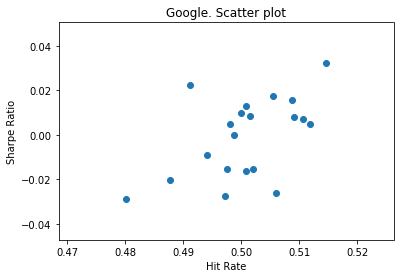

In [40]:
plt.scatter(hr, sr)
plt.title('Google. Scatter plot')
plt.xlabel('Hit Rate')
plt.ylabel('Sharpe Ratio')
plt.show()

In [41]:
def fb_rand():
    fb['Random'] = norm.rvs(loc=0, scale=1, size=len(fb['Returns']))
    fb['Pnl'] = fb["Returns"]*fb['Random']
    sr.append(fb['Pnl'].mean()/fb['Pnl'].std())
    hr.append(sum(np.sign(fb['Random']) == np.sign(fb['Returns']))/len(fb['Returns']))
    return

hr = []
sr = []
for i in range(20):
    fb_rand()

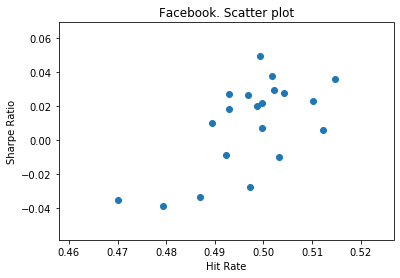

In [42]:
plt.scatter(hr, sr)
plt.title('Facebook. Scatter plot')
plt.xlabel('Hit Rate')
plt.ylabel('Sharpe Ratio')
plt.show()